In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import missingno as msno  # optional for missing value visualization


Loading Dataset

In [ ]:
df = pd.read_csv("OnlineRetail_Cleaned.csv",encoding='ISO-8859-1')


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [ ]:
df.Country.nunique()

38

In [ ]:
df[df['Country']=='United Kingdom']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
##statistical analysis can be done with the help of describe()

df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(536641, 8)

In [ ]:
df.InvoiceNo.unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

In [ ]:
df.InvoiceNo.nunique()

3230

In [ ]:
df['CustomerID']

,CustomerID
0,17850.0
1,17850.0
2,17850.0
3,17850.0
4,17850.0
...,...
541904,12680.0
541905,12680.0
541906,12680.0
541907,12680.0


In [ ]:
df['CustomerID'].unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

In [ ]:
df['CustomerID'].nunique()

4372

In [ ]:
df.shape

(536641, 8)

In [ ]:
df['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

In [ ]:
df['Quantity'].nunique()

722

In [ ]:
df.Country.unique()[0]

'United Kingdom'

In [ ]:
df.Country.unique()[2]

'Australia'

In [ ]:
type(df.Country.unique()[0])

str

In [ ]:
df['Country'] = df['Country'].apply(lambda x: np.where(x == "","NA",x))
print(df['Country'].unique())

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [ ]:
df.Country.nunique()

38

In [ ]:
df.StockCode.unique()

array(['85123A', '71053', '84406B', ..., '90214U', '47591b', '23843'],
      dtype=object)

In [ ]:
df.StockCode.nunique()

4070

In [ ]:
ti=[ ]
df['InvoiceNo'].apply(lambda x:ti.extend(x.split(",")))
ti=pd.Series(ti)
n=ti.nunique()
print("Total unique invoice no =  ", n)

Total unique invoice no =   25900


In [ ]:
df[['InvoiceNo','StockCode','CustomerID']].describe()

,CustomerID
count,401604.000000
mean,15281.160818
std,1714.006089
min,12346.000000
25%,13939.000000
50%,15145.000000
75%,16784.000000
max,18287.000000


In [ ]:
df[['InvoiceNo','StockCode','CustomerID']].head()

,InvoiceNo,StockCode,CustomerID
0,536365,85123A,17850.0
1,536365,71053,17850.0
2,536365,84406B,17850.0
3,536365,84029G,17850.0
4,536365,84029E,17850.0


In [ ]:
df[['InvoiceNo','StockCode','CustomerID']].describe().loc[['count','mean','max']]

,CustomerID
count,401604.000000
mean,15281.160818
max,18287.000000


In [ ]:
df['Description']

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
541904,PACK OF 20 SPACEBOY NAPKINS
541905,CHILDREN'S APRON DOLLY GIRL
541906,CHILDRENS CUTLERY DOLLY GIRL
541907,CHILDRENS CUTLERY CIRCUS PARADE


In [ ]:
df['Description'].nunique()

4223

In [ ]:
df['Description'].shape

(536641,)

In [ ]:
vcount = df['Country'].value_counts()
vcount

,count
Country,
United Kingdom,490300
Germany,9480
France,8541
EIRE,8184
Spain,2528
Netherlands,2371
Belgium,2069
Switzerland,1994
Portugal,1510


In [ ]:
df.Quantity

,Quantity
0,6
1,6
2,8
3,6
4,6
...,...
541904,12
541905,6
541906,4
541907,4


Here we are plotting quantity range from 0 to 30

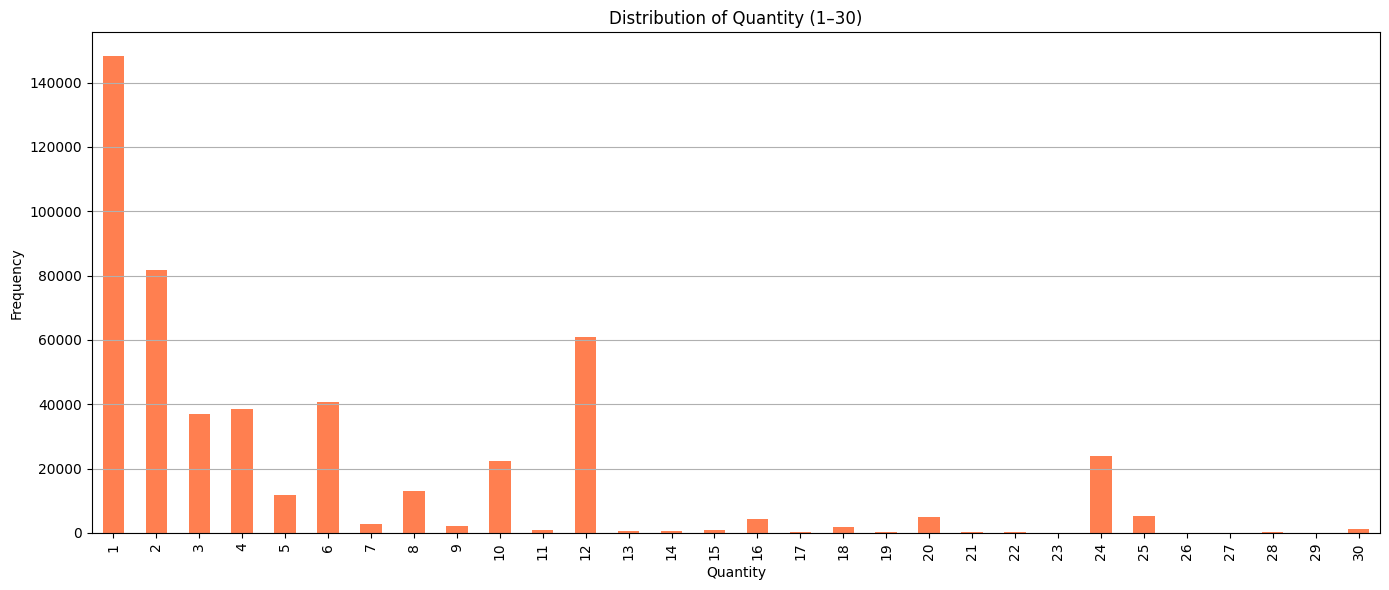

In [ ]:
# Filter for quantities within a reasonable range for visibility (e.g. 0–100)
filtered_df = df[(df['Quantity'] > 0) & (df['Quantity'] <= 30)]

# Count occurrences of each quantity value
quantity_counts = filtered_df['Quantity'].value_counts().sort_index()

# Plot the barplot
plt.figure(figsize=(14, 6))
quantity_counts.plot(kind='bar', color='coral')
plt.title('Distribution of Quantity (1–30)')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Identifying outliers in Unit Price

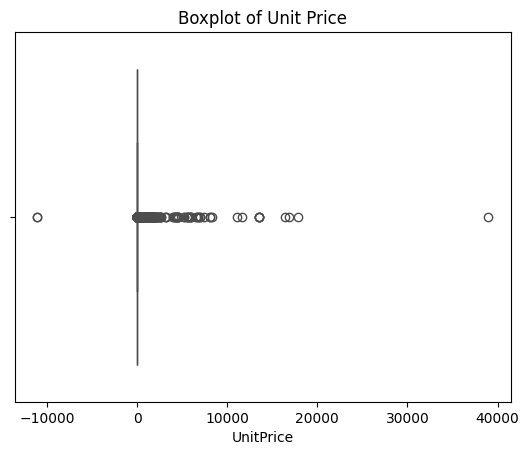

In [ ]:
#Identifying outliers in unitprice
sns.boxplot(x=df['UnitPrice'], color='orange')
plt.title('Boxplot of Unit Price')
plt.show()


To compare frequencies of categorical values like Country

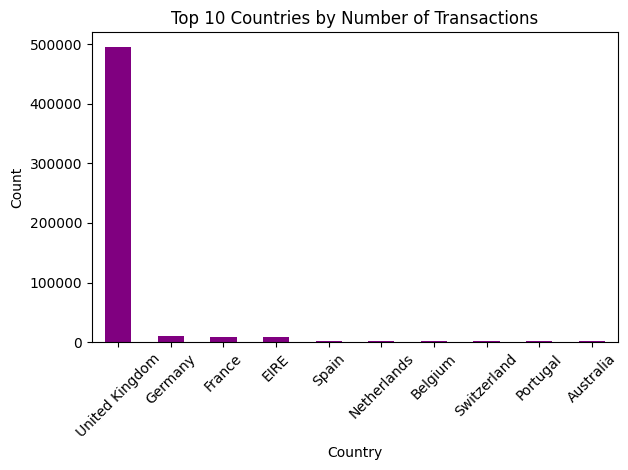

In [ ]:
df['Country'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Countries by Number of Transactions')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Analyzing trends over time (e.g. number of orders per day)

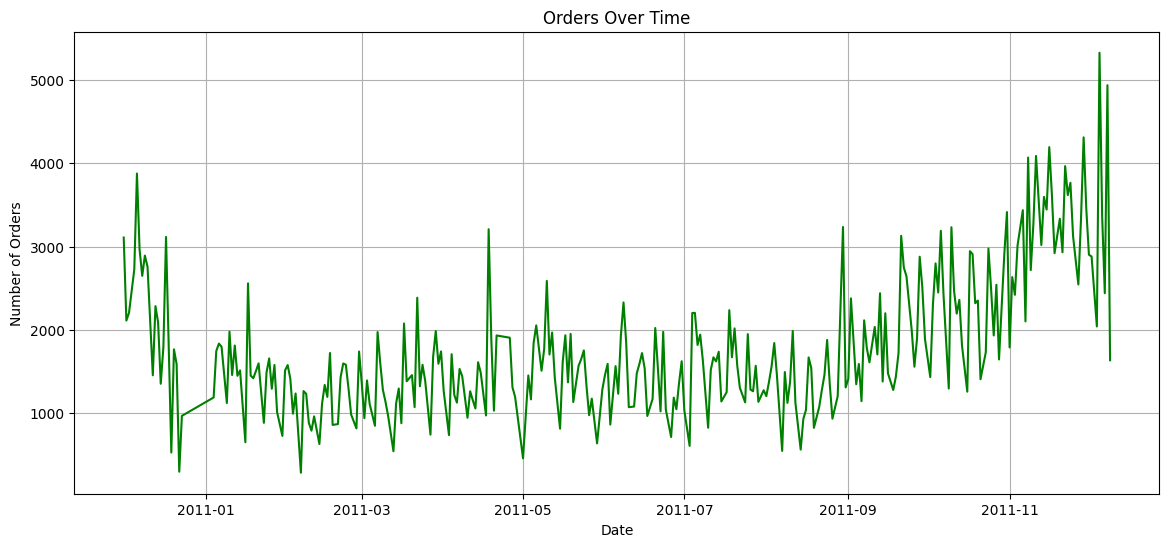

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDay'] = df['InvoiceDate'].dt.date
orders_per_day = df.groupby('InvoiceDay').size()

orders_per_day.plot(figsize=(14, 6), color='green')
plt.title('Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()


<ipython-input-76-d022f426744c>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=filtered_df, x='UnitPrice', shade=True, color='blue')


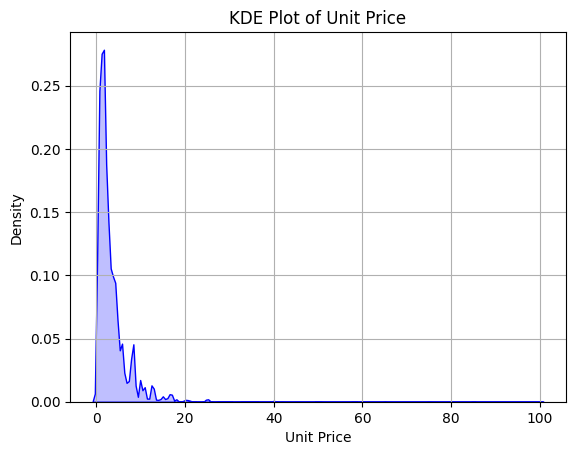

In [ ]:
# Optional: Filter out extreme values for better visualization
filtered_df = df[(df['UnitPrice'] > 0) & (df['UnitPrice'] < 100)]

# KDE plot
sns.kdeplot(data=filtered_df, x='UnitPrice', shade=True, color='blue')
plt.title('KDE Plot of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Density')
plt.grid(True)
plt.show()


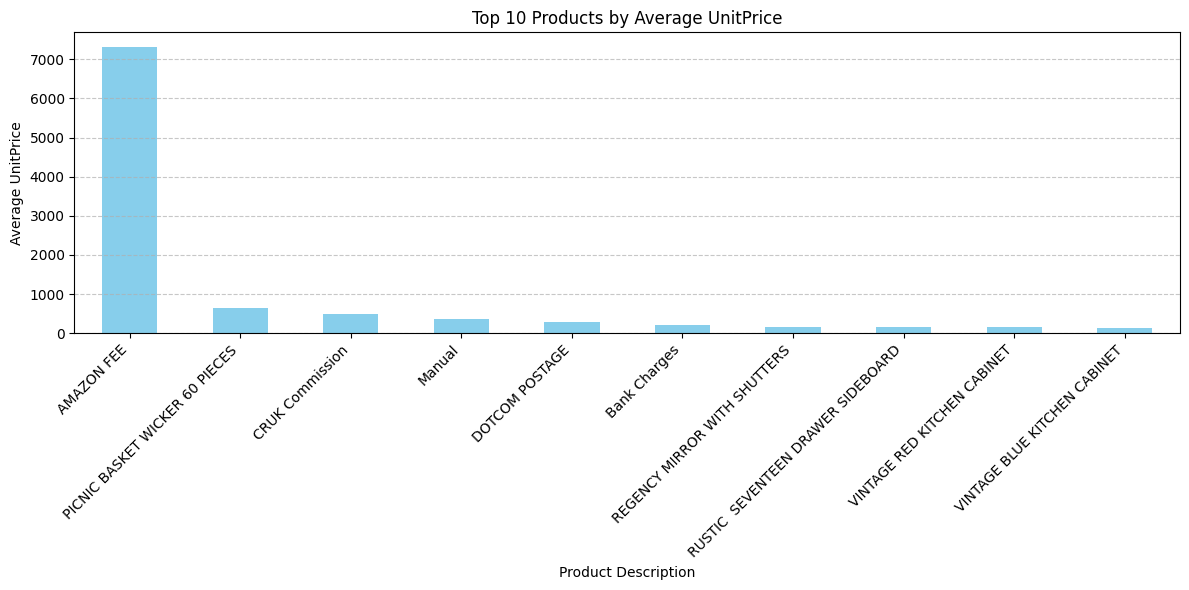

In [ ]:
# Group by Description and calculate average UnitPrice
avg_price_by_product = df.groupby("Description")["UnitPrice"].mean().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
avg_price_by_product.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Average UnitPrice')
plt.ylabel('Average UnitPrice')
plt.xlabel('Product Description')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Comparing price distribution across countries

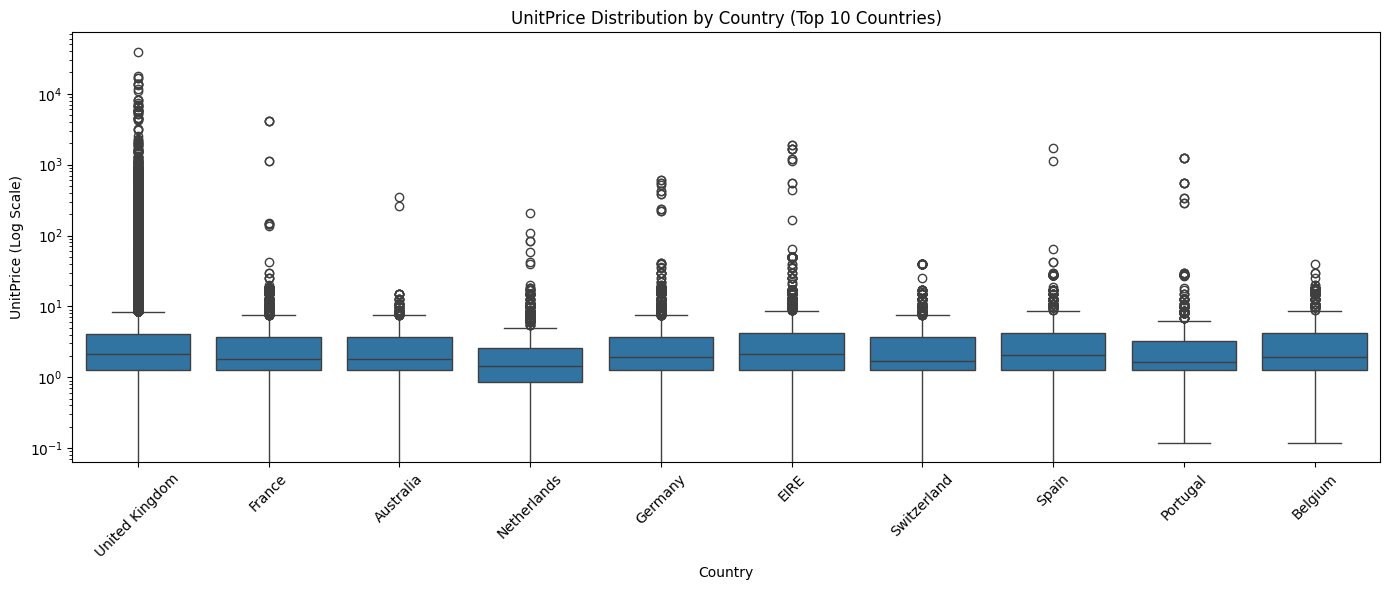

In [ ]:
# Select top 10 countries by number of transactions for clearer plot
top_countries = df['Country'].value_counts().head(10).index
filtered_df = df[df['Country'].isin(top_countries)]

# Plotting
plt.figure(figsize=(14, 6))
sns.boxplot(x='Country', y='UnitPrice', data=filtered_df)
plt.yscale('log')  # Log scale to handle extreme outliers better
plt.title('UnitPrice Distribution by Country (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('UnitPrice (Log Scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-9-bc950a381ee9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='bright')


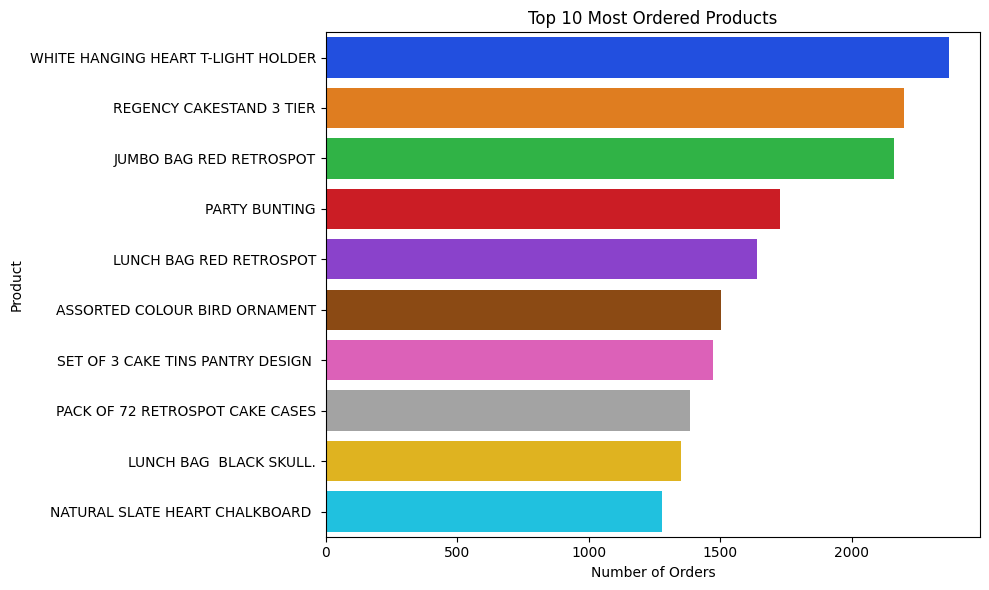

In [ ]:
# Top 10 most ordered items
top_products = df['Description'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='bright')
plt.title('Top 10 Most Ordered Products')
plt.xlabel('Number of Orders')
plt.ylabel('Product')
plt.tight_layout()
plt.show()
